# Breast Histopathology Image Classification Study

Life Cycle 1: Understand the problem.

The idea behind this project was to train a model, using the ML life cycle, to accurately differentiate between benign and malignant tumors given a dataset.

Explain the model of the problem which is classification.

he wants to see an understanding of the problem we are trying to solve with precision.
- he wants to see that we  understand precisely what the problem is. for example is it a regression or classification problem or something else and what does that mean
-If it is supervised learning what is the mapping the model tries to learn what is the input and what is the output

## 1. Load in Datasets

Life cycle 2: Collect the data
We used kaggle.com to download the dataset called "Breast Histopathology Images" (https://www.kaggle.com/adacslicml/breast-histopathology-images)
which contains a set of 'testing' and 'training' data as well as an extra 'valid' set. to access this data through the notebook we first had to import the tools to do it with, which include numpy for manipulation,
matplotlib to create graphs, glob is used to find file paths matching or using patterns, tensorflow for training the model.

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import glob as glob
import os
import tensorflow as tf

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

### Load in Training Set

Life Cycle 3: Prepare Data

In this section we loaded the names of all files in our training set from the Cancer and NoCancer folders into the varibales labeled `train_cancer` and `train_nocancer` using glob. We then added the images to `X_train` and the labels containing a 0 or 1 to `y_train`. Furthermore, we resized our imgages and added them to an array that will be remain untouch,so that it can later be reference and used as a sort of control group to test for misclassifications. 


In [2]:
# add both cancer and non cancer imgs to X_train
train_cancer = glob.glob('../input/breast-histopathology-images/BreastCancer/train/1_Cancer/*.png')[:2000]
train_nocancer = glob.glob('../input/breast-histopathology-images/BreastCancer/train/0_NoCancer/*.png')[:2000]

In [3]:
m = len(train_cancer)  
height = 150
width = 150

X_train_orig = []
X_train = np.zeros((2*m, height * width * 3))
count = 0


for name in train_cancer:
    im = Image.open(name)
    X_train_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_train[count] = im_array
    count += 1
    
for name in train_nocancer:
    im = Image.open(name)
    X_train_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_train[count] = im_array
    count += 1

In [4]:
#add labels to y_train
cancer_labels = [1 for i in range(m)]
noncancer_labels = [0 for i in range(m)]

y_train = np.array(cancer_labels + noncancer_labels)

### Load in Test Set

For the Testing set we followed an identical approach, where we loaded the names of all of our files from a seprate 'test' folder bearing the same names 'Cancer' and 'NoCancer'. We created two arrays,`X_test` and `y_test`, the labels containing a 0 or 1 will be stored in `y_test`. We resized our images and added them to the array `X_test`, and maintained an original copy or set of the images stored in the array `X_test_orig`. This last array remains untouched and is to be used to identify misclassifications later on. 

In [5]:
# add both cancer and non cancer imgs to X_test
test_cancer = glob.glob('../input/breast-histopathology-images/BreastCancer/test/0_NoCancer/*.png')[:2000]
test_nocancer = glob.glob('../input/breast-histopathology-images/BreastCancer/test/1_Cancer/*.png')[:2000]

In [6]:
X_test_orig = []
X_test = np.zeros((2*m, height * width * 3))
count = 0

for name in test_cancer:
    im = Image.open(name)
    X_test_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_test[count] = im_array
    count += 1
    
for name in test_nocancer:
    im = Image.open(name)
    X_test_orig.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    X_test[count] = im_array
    count += 1

In [7]:
#add labels to Y_test
cancer_labels = [1 for i in range(m)]
noncancer_labels = [0 for i in range(m)]

y_test = np.array(cancer_labels + noncancer_labels)

### Load Validation Set

For the Validation set we followed similar steps as in the blocks prior, loading the names of all of our files from a seprate 'valid' folder bearing the same names 'Cancer' and 'NoCancer'. We created the array `test_images`, containing a 0 or 1 to be be stored in `test_labels` ______. 

The validation set works in conjuction with the training set to fine tune the parameters. Similar to the quizzes or mini exams that a student might take throughout the semester to polish and adjust his knowledge on a subject. The Test set allows us to evaluate the model after all of these __ have taken place, similar to a final exam. It helps us accurately meassure the peformance of the model and how it generalize its knowledge in the face of new information.

In [8]:
# add both cancer and non cancer imgs to test_images
valid_cancer = glob.glob('../input/breast-histopathology-images/BreastCancer/valid/0_NoCancer/*.png')[:1000]
valid_nocancer = glob.glob('../input/breast-histopathology-images/BreastCancer/valid/1_Cancer/*.png')[:1000]

In [9]:
test_images = []

for name in valid_cancer:
    im = Image.open(name)
    test_images.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    test_images[count] = im_array
    count += 1
    
for name in valid_nocancer:
    im = Image.open(name)
    test_images.append(im)
    im_resize = im.resize((height, width))
    im_array = np.array(im_resize).reshape(-1) / 255
    test_images[count] = im_array
    count += 1

In [10]:
#add labels to Test_labels
valid_cancerlabels = [1 for i in range(m)]
valid_nocancerlabels = [0 for i in range(m)]

test_labels = np.array(valid_cancerlabels + valid_nocancerlabels)

test_labels = np.asarray(test_labels)

# 2. Random Forest Classifier

Life Cycle 4: Train Model
    
In this section we used a series of training model Random Forest Classifier, Logistic Regression, Keras NN Model.

The Random Forest Classifier (out of the many one) is useful for tasks that involved regression and classification. It works by iterating through a dataset and with each iteration it split/groups similar data points together in what is called a decision tree. This process is repeated to eventually build the forrest. Each algo/tree comes up with a set of criteria to group or identify the data it encounters. After the forrest is built, the different approaches taken by each of the trees are combined and used to finalize more accurate and stable decision. 

Logistic Regression is a useful model for classification problems where an either or answer is expected. It works by using statistics to predict probability of an outcome based on the ___ data. 

Finally we have the Keras Convolutional Neural Network. Keras is a deep learning library that we used to build a CNN. This model is useful for classifying images that are not fixed, meaning that the the subject being identified can appear in any position in the image. 



## Train the Model

explain our approach and analyze results.
We started this session by importing the random forest classifier algorithm and making a referenceable object. We passed the training set as argument
and __13__.

We test the accuracy rate of our training model for which we get 100%, this implpies that we may have an overfitting problem with our model. 

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_train_pred =  rf.predict(X_train)

### Training Accuracy

In [14]:
np.mean(y_train == y_train_pred)

1.0

## Test the Model

In [15]:
y_test_pred = rf.predict(X_test)

### Testing Accuracy

In [16]:
np.mean(y_test_pred == y_test)

0.3565

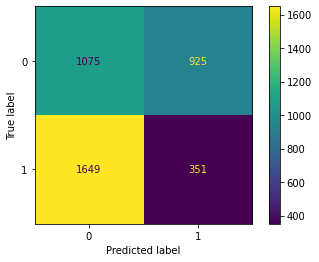

In [17]:
plot_confusion_matrix(rf, X_test, y_test, values_format = 'd')

# Conclusion

In conclusion we had an overfitting problem with our model since it adapted incredibly well to our training data but could not generalized that knowledge when used against the testing set. We know this because for the training accuracy we recieved a 100% which right away tell us that we have a problem. This could be that maybe the we do not have enough data or need to decrease the complexity of our model. This was confirmed when ran the testing model and got a 35.65%, which is a terribly underwhelming peformance. If we focus on our confusion matrix, which is just a graph thatallows uf to read what we have just understoon.   What te results mean is that for the testing peformance, the model estimated that ___ did not have cancer when in fact they did

We can see in the plot 

# 3. Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lr = LogisticRegression(max_iter = 10000)

## Train the Model

In [6]:
lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [7]:
y_train_pred =  lr.predict(X_train)

NameError: name 'X_train' is not defined

### Training Accuracy

In [8]:
np.mean(y_train == y_train_pred)

NameError: name 'y_train' is not defined

In [9]:
plot_confusion_matrix(lr, X_test, y_test, values_format = 'd')

NameError: name 'X_test' is not defined

## Test the Model

In [10]:
y_pred = lr.predict(X_test)

NameError: name 'X_test' is not defined

### Testing Accuracy

In [11]:
np.mean(y_pred == y_test)

NameError: name 'y_pred' is not defined

In [12]:
plot_confusion_matrix(rf, X_test, y_test, values_format = 'd')

NameError: name 'rf' is not defined

## Conclusion

blah blah

# 4. Keras NN Model

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(150, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(300, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(300, (3, 3), activation='relu'))


In [ ]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_orig, y_train, epochs=10, 
                    validation_data=(test_images, test_labels))


# Sorry

"The reality is not ideal, I understand" ~ Dr. Ding
We ended up changing our dataset numerous amount of times, each for different reasons but
when we finally thought we had found one, we had to change it again because it was part of a competition and did
not allow for collaboration in the platform we were using. We had great difficulty loading the data with the second to last 
dataset for some reason and it was substantial enough that we the amount of resources became a problem.
We lacked the cpu power to run the dataset and it was taking a long time to get anywhere even with the cpu runnig at full capacity.
Specially for the linear regression it took us hours to run the model